<a href="https://colab.research.google.com/github/tinekescode/NeuraleNetwerken/blob/main/Neurale_Netwerken_oefening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurale Netwerken

Wat je leert in deze cursus:
1. Hoe je packages moet installeren
2. Basis python concepten
3. Inladen van een dataset en deze visualiseren
4. Hoe bouw ik een Neuraal Netwerk
5. Train het netwerk op onze dataset en test of het werkt

## 1. Packages installeren

In [ ]:
# Uncomment these lines if you're in Google Colab or don't have packages installed:
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install pandas

# If you see any errors above, that's normal - it means the packages are already installed.

# Basic math and data handling
import numpy as np              # For mathematical operations
import pandas as pd            # For data manipulation (like Excel for Python)
import matplotlib.pyplot as plt # For creating graphs and charts
import seaborn as sns          # For beautiful statistical plots

# Machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make plots appear in the notebook
%matplotlib inline

# Set random seed for reproducible results
np.random.seed(42)

print("All packages imported successfully!")

All packages imported successfully!


## 2. Basis Python concepten
Voor degenen die nog nooit Python code gezien hebben hier de korte basis Python voor Dummies:

In [ ]:
# Variables - like containers that hold data
my_name = "Neural Network Student"
my_age = 25
print(f"Hello! I'm {my_name} and I'm {my_age} years old.")

# Lists - collections of items
fruits = ["apple", "banana", "orange"]
print(f"My favorite fruits: {fruits}")

# Numpy arrays - like lists but for math
numbers = np.array([1, 2, 3, 4, 5])
print(f"Numbers: {numbers}")
print(f"Numbers squared: {numbers**2}")

# Dictionaries - store information with labels
person = {
    "name": "Alice",
    "age": 30,
    "city": "New York"
}
print(f"Person info: {person}")
print(f"Person name: {person['name']}")

Hello! I'm Neural Network Student and I'm 25 years old.
My favorite fruits: ['apple', 'banana', 'orange']
Numbers: [1 2 3 4 5]
Numbers squared: [ 1  4  9 16 25]
Person info: {'name': 'Alice', 'age': 30, 'city': 'New York'}
Person name: Alice


3. Inladen en onderzoeken van een dataset

Hieronder gaan we de dataset van iris bloemen inlezen die we gaan gebruiken om ons model te trainen en testen. In deze dataset zitten 150 bloemen van 3 verschillende soorten.

In [ ]:
# Load the Iris dataset
iris = load_iris()
print("✅ Dataset loaded successfully!")

# Let's explore what we have
print(f"\nDataset shape: {iris.data.shape}")
print(f"This means: {iris.data.shape[0]} flowers, {iris.data.shape[1]} measurements per flower")

print(f"\nFlower species in our dataset:")
for i, species in enumerate(iris.target_names):
    print(f"  {i}: {species}")

print(f"\nMeasurements we have for each flower:")
for i, feature in enumerate(iris.feature_names):
    print(f"  {i}: {feature}")

✅ Dataset loaded successfully!

Dataset shape: (150, 4)
This means: 150 flowers, 4 measurements per flower

Flower species in our dataset:
  0: setosa
  1: versicolor
  2: virginica

Measurements we have for each flower:
  0: sepal length (cm)
  1: sepal width (cm)
  2: petal length (cm)
  3: petal width (cm)


In [ ]:
# Convert to a more user-friendly format
X = iris.data  # The measurements (features)
y = iris.target  # The species (what we want to predict)

# Create a DataFrame - like a spreadsheet in Python
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in y]

print("First 10 flowers in our dataset:")
print(df.head(10))

print(f"\nDataset summary:")
print(f"Total flowers: {len(df)}")
print(f"Flowers per species:")
print(df['species'].value_counts())

# Basic statistics
print(f"\nBasic statistics for our measurements:")
print(df.describe())

First 10 flowers in our dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7

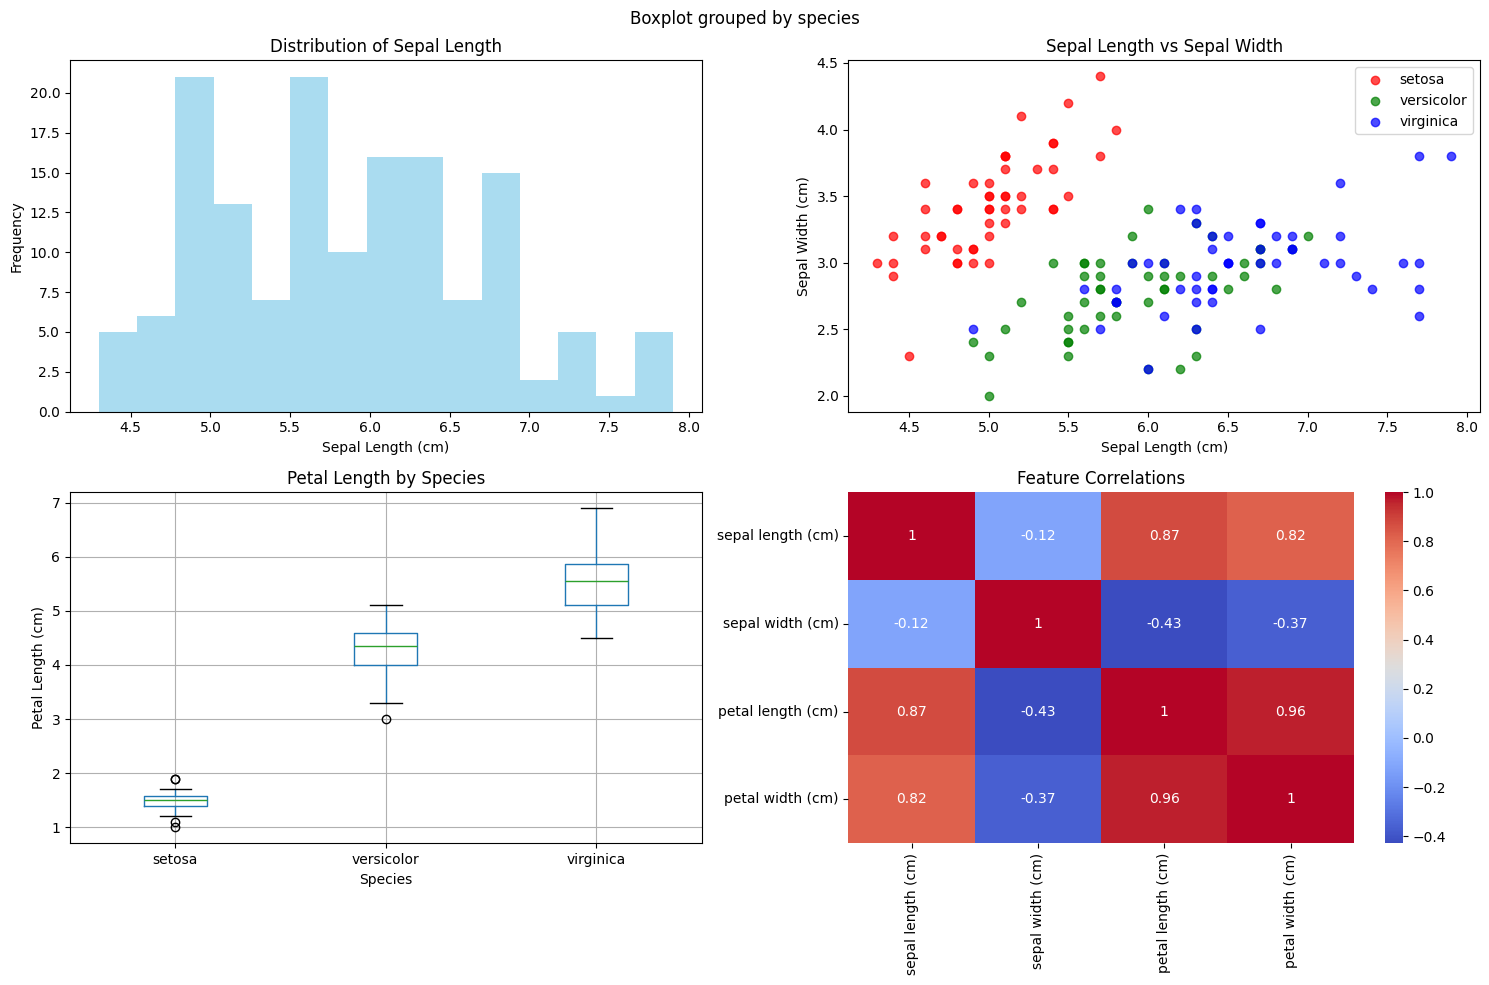

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Iris Dataset Exploration', fontsize=16, fontweight='bold')

# 1. Histogram of sepal length
axes[0, 0].hist(df['sepal length (cm)'], bins=15, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Sepal Length')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')

# 2. Scatter plot: Sepal length vs Sepal width
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = df['species'] == species
    axes[0, 1].scatter(df[mask]['sepal length (cm)'],
                      df[mask]['sepal width (cm)'],
                      c=colors[i], label=species, alpha=0.7)
axes[0, 1].set_title('Sepal Length vs Sepal Width')
axes[0, 1].set_xlabel('Sepal Length (cm)')
axes[0, 1].set_ylabel('Sepal Width (cm)')
axes[0, 1].legend()

# 3. Box plot of petal length by species
df.boxplot(column='petal length (cm)', by='species', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Petal Length (cm)')

# 4. Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlations')

plt.tight_layout()
plt.show()